In [211]:
print('hello, world!')

hello, world!


In [209]:
import pandas as pd
# Load the Excel file
df = pd.read_excel(r'C:\Users\siddh\Downloads\energy_updated.xlsx')
# Check the first few rows
df.head()

,floor,date,day,consumption,createdAt,updatedAt
0,First Floor,2023-09-01 00:00:29.233,Friday,161.10,2024-09-25 10:54:02.172,2024-09-25 10:54:02.172
1,Ground Floor,2023-09-01 00:00:29.233,Friday,27.71,2024-09-25 10:54:02.173,2024-09-25 10:54:02.173
2,Second Floor,2023-09-01 00:00:29.233,Friday,108.12,2024-09-25 10:54:02.173,2024-09-25 10:54:02.173
3,First Floor,2023-09-02 00:00:15.160,Saturday,55.44,2024-09-25 10:54:02.173,2024-09-25 10:54:02.173
4,Ground Floor,2023-09-02 00:00:15.160,Saturday,14.34,2024-09-25 10:54:02.173,2024-09-25 10:54:02.173


In [207]:
# Filter for first floor data
first_floor_df = df[df['floor'] == 'First Floor'].copy()
first_floor_df.head()

,floor,date,day,consumption,createdAt,updatedAt
0,First Floor,2023-09-01 00:00:29.233,Friday,161.10,2024-09-25 10:54:02.172,2024-09-25 10:54:02.172
3,First Floor,2023-09-02 00:00:15.160,Saturday,55.44,2024-09-25 10:54:02.173,2024-09-25 10:54:02.173
6,First Floor,2023-09-03 00:00:30.394,Sunday,46.55,2024-09-25 10:54:02.173,2024-09-25 10:54:02.173
9,First Floor,2023-09-04 00:00:33.006,Monday,99.10,2024-09-25 10:54:02.173,2024-09-25 10:54:02.173
14,First Floor,2023-09-06 10:40:18.479,Wednesday,100.11,2024-09-25 10:54:02.173,2024-09-25 10:54:02.173


In [165]:
# Convert the 'Date' column to datetime (assuming it's called 'Date')
first_floor_df['date'] = pd.to_datetime(first_floor_df['date'])
first_floor_df.head()

,floor,date,day,consumption,createdAt,updatedAt
0,First Floor,2023-09-01 00:00:29.233,Friday,161.10,2024-09-25 10:54:02.172,2024-09-25 10:54:02.172
3,First Floor,2023-09-02 00:00:15.160,Saturday,55.44,2024-09-25 10:54:02.173,2024-09-25 10:54:02.173
6,First Floor,2023-09-03 00:00:30.394,Sunday,46.55,2024-09-25 10:54:02.173,2024-09-25 10:54:02.173
9,First Floor,2023-09-04 00:00:33.006,Monday,99.10,2024-09-25 10:54:02.173,2024-09-25 10:54:02.173
14,First Floor,2023-09-06 10:40:18.479,Wednesday,100.11,2024-09-25 10:54:02.173,2024-09-25 10:54:02.173


In [177]:
# Filter out weekends (Monday=0, Sunday=6)
weekday_data = first_floor_df[first_floor_df['date'].dt.weekday < 5]
weekday_data.head()

,floor,date,day,consumption,createdAt,updatedAt
0,First Floor,2023-09-01 00:00:29.233,Friday,161.10,2024-09-25 10:54:02.172,2024-09-25 10:54:02.172
9,First Floor,2023-09-04 00:00:33.006,Monday,99.10,2024-09-25 10:54:02.173,2024-09-25 10:54:02.173
14,First Floor,2023-09-06 10:40:18.479,Wednesday,100.11,2024-09-25 10:54:02.173,2024-09-25 10:54:02.173
15,First Floor,2023-09-07 00:00:02.879,Thursday,149.34,2024-09-25 10:54:02.173,2024-09-25 10:54:02.173
18,First Floor,2023-09-08 00:00:12.765,Friday,150.29,2024-09-25 10:54:02.174,2024-09-25 10:54:02.174


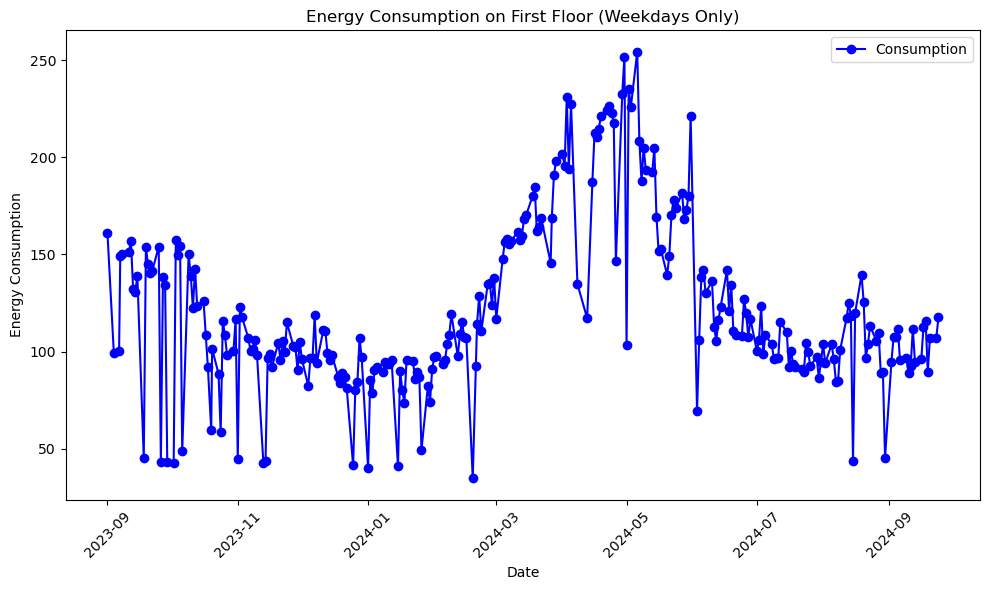

In [171]:
import matplotlib.pyplot as plt

# Plot consumption over time (assuming 'consumption' is the column name)
plt.figure(figsize=(10, 6))
plt.plot(weekday_data['date'], weekday_data['consumption'], color='blue', marker='o', linestyle='-', label='Consumption')

# Add labels, title, and legend
plt.xlabel('Date')
plt.ylabel('Energy Consumption')
plt.title('Energy Consumption on First Floor (Weekdays Only)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.legend()
plt.show()


In [187]:
# Convert 'Date' column to ordinal numbers (or use timestamps if preferred)
weekday_data.loc[:, 'Date_ordinal'] = weekday_data['date'].map(pd.Timestamp.toordinal)

# Calculate the correlation between 'Date_ordinal' and 'consumption'
correlation = weekday_data[['Date_ordinal', 'consumption']].corr()

# Display the correlation matrix
print(correlation)



              Date_ordinal  consumption
Date_ordinal      1.000000     0.115906
consumption       0.115906     1.000000


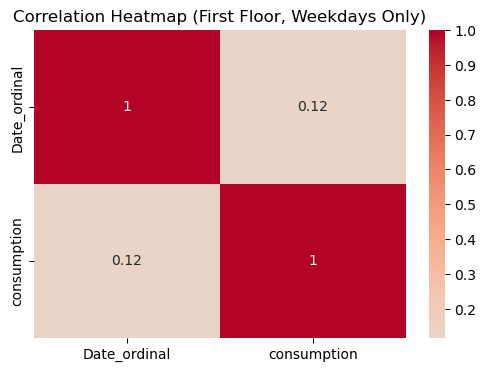

In [191]:
import seaborn as sns

# Plot heatmap of the correlation matrix
plt.figure(figsize=(6, 4))
sns.heatmap(correlation, annot=True, cmap='coolwarm', center=0)

# Add title
plt.title('Correlation Heatmap (First Floor, Weekdays Only)')
plt.show()


In [195]:
from sklearn.linear_model import LinearRegression

# Define the predictor and target variables
X = weekday_data[['date']]  # Replace with the relevant predictor(s)
y = weekday_data['consumption']

# Create the linear regression model
model = LinearRegression()
model.fit(X, y)

# Get the coefficient (slope) and intercept
slope = model.coef_[0]
intercept = model.intercept_

# Print the regression line equation
print(f'Regression line: consumption = {slope} * Temperature + {intercept}')


Regression line: consumption = 5.151171429061858e-16 * Temperature + -759.85191855934


Regression line: consumption = 0.04451575361007403 * Date_ordinal + -32774.12509521431


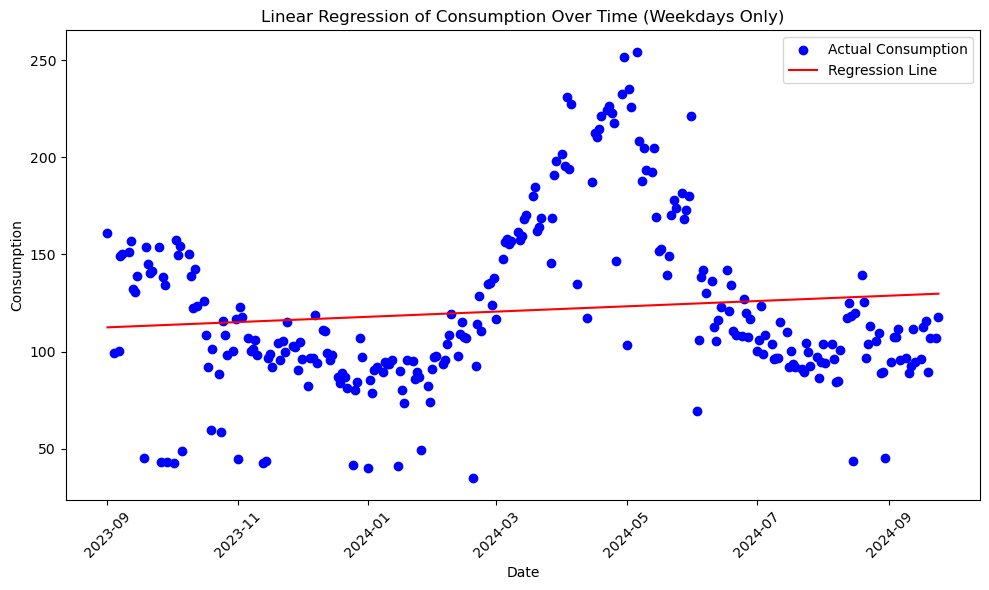

In [199]:
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import numpy as np

# Convert 'Date' to ordinal for numerical analysis
weekday_data.loc[:, 'Date_ordinal'] = weekday_data['date'].map(pd.Timestamp.toordinal)

# Define the predictor (X) and target (y) variables
X = weekday_data[['Date_ordinal']]  # 'Date_ordinal' is the numerical version of 'Date'
y = weekday_data['consumption']

# Create the linear regression model
model = LinearRegression()
model.fit(X, y)

# Get the coefficient (slope) and intercept
slope = model.coef_[0]
intercept = model.intercept_

# Print the regression line equation
print(f'Regression line: consumption = {slope} * Date_ordinal + {intercept}')

# Plot the actual data points
plt.figure(figsize=(10, 6))
plt.scatter(weekday_data['date'], y, color='blue', label='Actual Consumption')

# Create predictions using the regression line
predicted_consumption = model.predict(X)

# Plot the regression line
plt.plot(weekday_data['date'], predicted_consumption, color='red', label='Regression Line')

# Add labels, title, and legend
plt.xlabel('Date')
plt.ylabel('Consumption')
plt.title('Linear Regression of Consumption Over Time (Weekdays Only)')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()

# Show the plot
plt.show()


Regression line (for 3 months): consumption = -0.5130321518047692 * Date_ordinal + 379142.91545791953


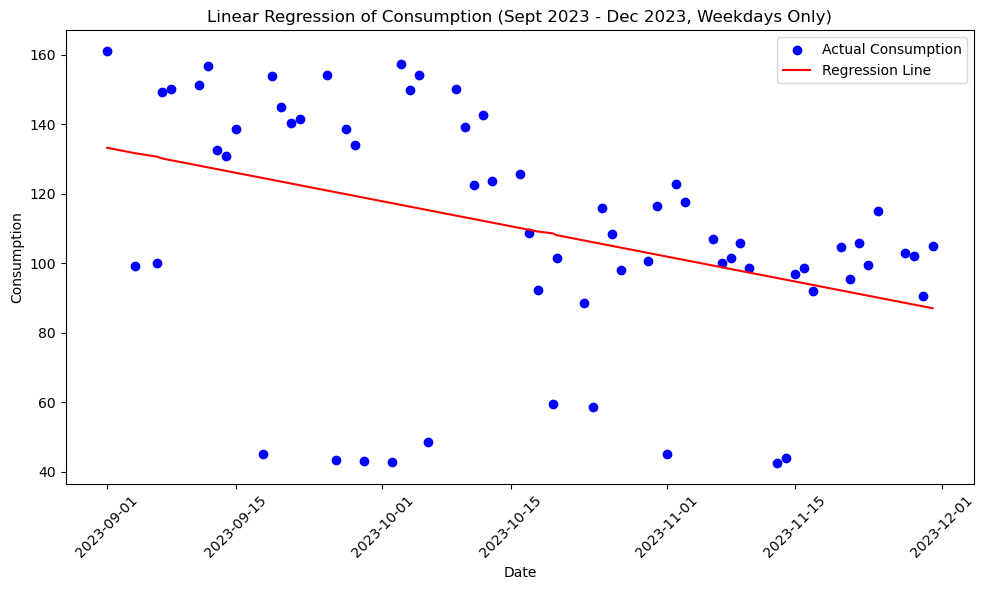

In [203]:
# Define the date range (September 1, 2023 to December 1, 2023)
start_date = '2023-09-01'
end_date = '2023-12-01'

# Filter the weekday_data to only include rows within this date range
filtered_data = weekday_data[(weekday_data['date'] >= start_date) & (weekday_data['date'] <= end_date)]

# Convert 'Date' to ordinal for numerical analysis (on the filtered data)
filtered_data.loc[:, 'Date_ordinal'] = filtered_data['date'].map(pd.Timestamp.toordinal)

# Define the predictor (X) and target (y) variables
X_filtered = filtered_data[['Date_ordinal']]
y_filtered = filtered_data['consumption']

# Create the linear regression model
model = LinearRegression()
model.fit(X_filtered, y_filtered)

# Get the coefficient (slope) and intercept
slope = model.coef_[0]
intercept = model.intercept_

# Print the regression line equation
print(f'Regression line (for 3 months): consumption = {slope} * Date_ordinal + {intercept}')

# Plot the actual data points
plt.figure(figsize=(10, 6))
plt.scatter(filtered_data['date'], y_filtered, color='blue', label='Actual Consumption')

# Create predictions using the regression line
predicted_consumption_filtered = model.predict(X_filtered)

# Plot the regression line
plt.plot(filtered_data['date'], predicted_consumption_filtered, color='red', label='Regression Line')

# Add labels, title, and legend
plt.xlabel('Date')
plt.ylabel('Consumption')
plt.title('Linear Regression of Consumption (Sept 2023 - Dec 2023, Weekdays Only)')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()

# Show the plot
plt.show()


Weak Positive Correlation (0.115906): The value of 0.115906 suggests that as time progresses (from September 1 to December 1), there is a slight increase in energy consumption, but it is not a strong relationship. In practical terms, it means that the change in consumption over time is minimal, and other factors might be influencing consumption more strongly than time itself.

A correlation value closer to 1 would indicate a strong positive relationship (where consumption would consistently increase with time).
A value closer to 0 (as we see here) means that there is little to no linear relationship between time and consumption.

In [7]:
import pandas as pd
# Load the Excel file
df = pd.read_excel(r'C:\Users\siddh\Downloads\energy_updated.xlsx')
# Check the first few rows
df.head()

,floor,date,day,consumption,createdAt,updatedAt
0,First Floor,2023-09-01 00:00:29.233,Friday,161.10,2024-09-25 10:54:02.172,2024-09-25 10:54:02.172
1,Ground Floor,2023-09-01 00:00:29.233,Friday,27.71,2024-09-25 10:54:02.173,2024-09-25 10:54:02.173
2,Second Floor,2023-09-01 00:00:29.233,Friday,108.12,2024-09-25 10:54:02.173,2024-09-25 10:54:02.173
3,First Floor,2023-09-02 00:00:15.160,Saturday,55.44,2024-09-25 10:54:02.173,2024-09-25 10:54:02.173
4,Ground Floor,2023-09-02 00:00:15.160,Saturday,14.34,2024-09-25 10:54:02.173,2024-09-25 10:54:02.173


In [9]:
# Filter for first floor data
second_floor_df = df[df['floor'] == 'Second Floor'].copy()
second_floor_df.head()

,floor,date,day,consumption,createdAt,updatedAt
2,Second Floor,2023-09-01 00:00:29.233,Friday,108.12,2024-09-25 10:54:02.173,2024-09-25 10:54:02.173
5,Second Floor,2023-09-02 00:00:15.160,Saturday,44.47,2024-09-25 10:54:02.173,2024-09-25 10:54:02.173
8,Second Floor,2023-09-03 00:00:30.394,Sunday,33.66,2024-09-25 10:54:02.173,2024-09-25 10:54:02.173
11,Second Floor,2023-09-04 00:00:33.006,Monday,86.00,2024-09-25 10:54:02.173,2024-09-25 10:54:02.173
13,Second Floor,2023-09-06 10:40:18.478,Wednesday,64.16,2024-09-25 10:54:02.173,2024-09-25 10:54:02.173


In [11]:
second_floor_df['date'] = pd.to_datetime(second_floor_df['date'])
second_floor_df.head()

,floor,date,day,consumption,createdAt,updatedAt
2,Second Floor,2023-09-01 00:00:29.233,Friday,108.12,2024-09-25 10:54:02.173,2024-09-25 10:54:02.173
5,Second Floor,2023-09-02 00:00:15.160,Saturday,44.47,2024-09-25 10:54:02.173,2024-09-25 10:54:02.173
8,Second Floor,2023-09-03 00:00:30.394,Sunday,33.66,2024-09-25 10:54:02.173,2024-09-25 10:54:02.173
11,Second Floor,2023-09-04 00:00:33.006,Monday,86.00,2024-09-25 10:54:02.173,2024-09-25 10:54:02.173
13,Second Floor,2023-09-06 10:40:18.478,Wednesday,64.16,2024-09-25 10:54:02.173,2024-09-25 10:54:02.173


In [13]:
weekday_data_2 = second_floor_df[second_floor_df['date'].dt.weekday < 5]
weekday_data_2.head()

,floor,date,day,consumption,createdAt,updatedAt
2,Second Floor,2023-09-01 00:00:29.233,Friday,108.12,2024-09-25 10:54:02.173,2024-09-25 10:54:02.173
11,Second Floor,2023-09-04 00:00:33.006,Monday,86.00,2024-09-25 10:54:02.173,2024-09-25 10:54:02.173
13,Second Floor,2023-09-06 10:40:18.478,Wednesday,64.16,2024-09-25 10:54:02.173,2024-09-25 10:54:02.173
17,Second Floor,2023-09-07 00:00:02.879,Thursday,125.08,2024-09-25 10:54:02.174,2024-09-25 10:54:02.174
20,Second Floor,2023-09-08 00:00:12.765,Friday,94.57,2024-09-25 10:54:02.174,2024-09-25 10:54:02.174


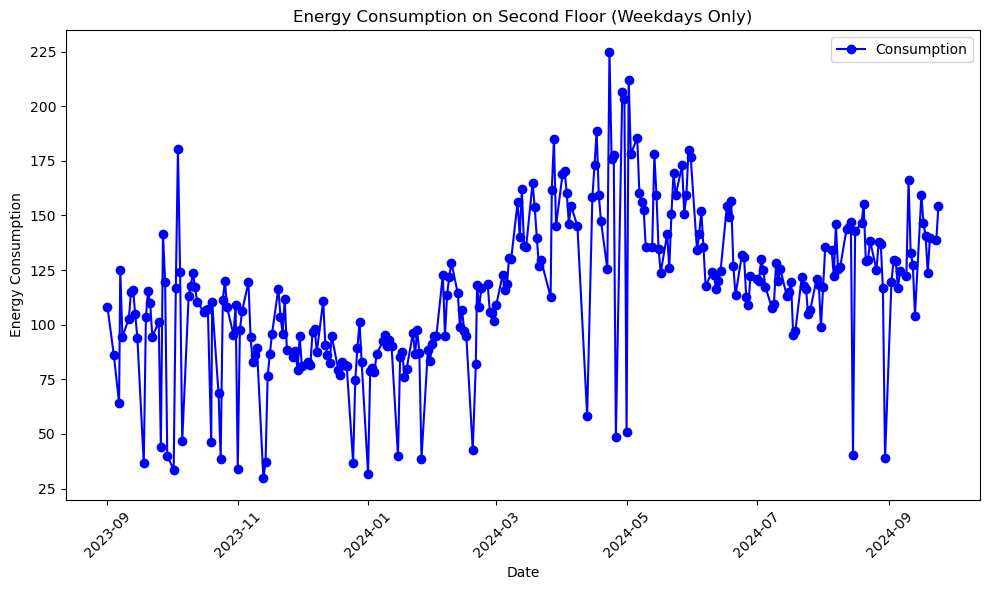

In [15]:
import matplotlib.pyplot as plt

# Plot consumption over time (assuming 'consumption' is the column name)
plt.figure(figsize=(10, 6))
plt.plot(weekday_data_2['date'], weekday_data_2['consumption'], color='blue', marker='o', linestyle='-', label='Consumption')

# Add labels, title, and legend
plt.xlabel('Date')
plt.ylabel('Energy Consumption')
plt.title('Energy Consumption on Second Floor (Weekdays Only)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.legend()
plt.show()

In [17]:
# Convert 'Date' column to ordinal numbers (or use timestamps if preferred)
weekday_data_2.loc[:, 'Date_ordinal'] = weekday_data_2['date'].map(pd.Timestamp.toordinal)

# Calculate the correlation between 'Date_ordinal' and 'consumption'
correlation = weekday_data_2[['Date_ordinal', 'consumption']].corr()

# Display the correlation matrix
print(correlation)

              Date_ordinal  consumption
Date_ordinal      1.000000     0.474388
consumption       0.474388     1.000000


C:\Users\siddh\AppData\Local\Temp\ipykernel_7948\531852503.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  weekday_data_2.loc[:, 'Date_ordinal'] = weekday_data_2['date'].map(pd.Timestamp.toordinal)


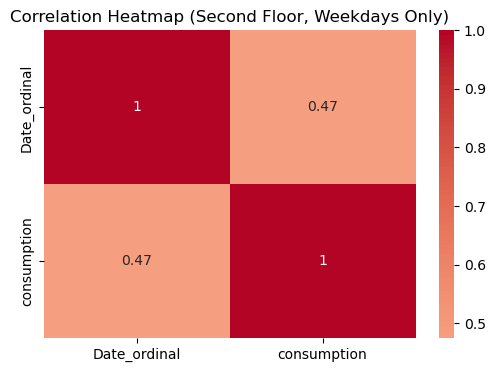

In [27]:
import seaborn as sns

# Plot heatmap of the correlation matrix
plt.figure(figsize=(6, 4))
sns.heatmap(correlation, annot=True, cmap='coolwarm', center=0)

# Add title
plt.title('Correlation Heatmap (Second Floor, Weekdays Only)')
plt.show()


In [21]:
from sklearn.linear_model import LinearRegression

# Define the predictor and target variables
X = weekday_data_2[['date']]  # Replace with the relevant predictor(s)
y = weekday_data_2['consumption']

# Create the linear regression model
model = LinearRegression()
model.fit(X, y)

# Get the coefficient (slope) and intercept
slope = model.coef_[0]
intercept = model.intercept_

# Print the regression line equation
print(f'Regression line: consumption = {slope} * Temperature + {intercept}')

Regression line: consumption = 1.7091076294269163e-15 * Temperature + -2807.985088011731


Regression line: consumption = 0.14768503369142655 * Date_ordinal + -109017.95456601708


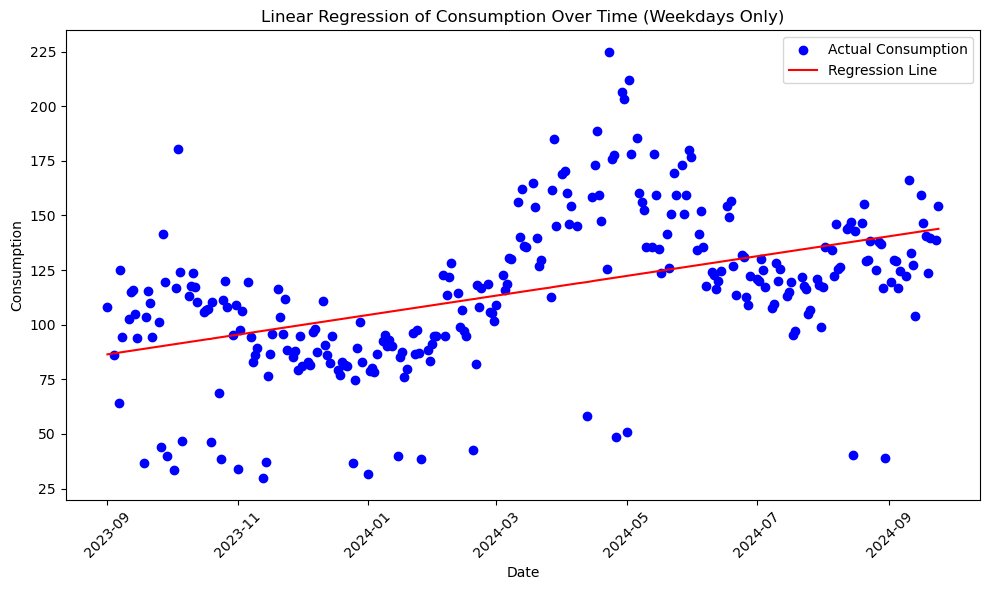

In [23]:
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import numpy as np

# Convert 'Date' to ordinal for numerical analysis
weekday_data_2.loc[:, 'Date_ordinal'] = weekday_data_2['date'].map(pd.Timestamp.toordinal)

# Define the predictor (X) and target (y) variables
X = weekday_data_2[['Date_ordinal']]  # 'Date_ordinal' is the numerical version of 'Date'
y = weekday_data_2['consumption']

# Create the linear regression model
model = LinearRegression()
model.fit(X, y)

# Get the coefficient (slope) and intercept
slope = model.coef_[0]
intercept = model.intercept_

# Print the regression line equation
print(f'Regression line: consumption = {slope} * Date_ordinal + {intercept}')

# Plot the actual data points
plt.figure(figsize=(10, 6))
plt.scatter(weekday_data_2['date'], y, color='blue', label='Actual Consumption')

# Create predictions using the regression line
predicted_consumption = model.predict(X)

# Plot the regression line
plt.plot(weekday_data_2['date'], predicted_consumption, color='red', label='Regression Line')

# Add labels, title, and legend
plt.xlabel('Date')
plt.ylabel('Consumption')
plt.title('Linear Regression of Consumption Over Time (Weekdays Only)')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()

# Show the plot
plt.show()

Regression line (for 3 months): consumption = -0.15850735362345725 * Date_ordinal + 117201.00974488485


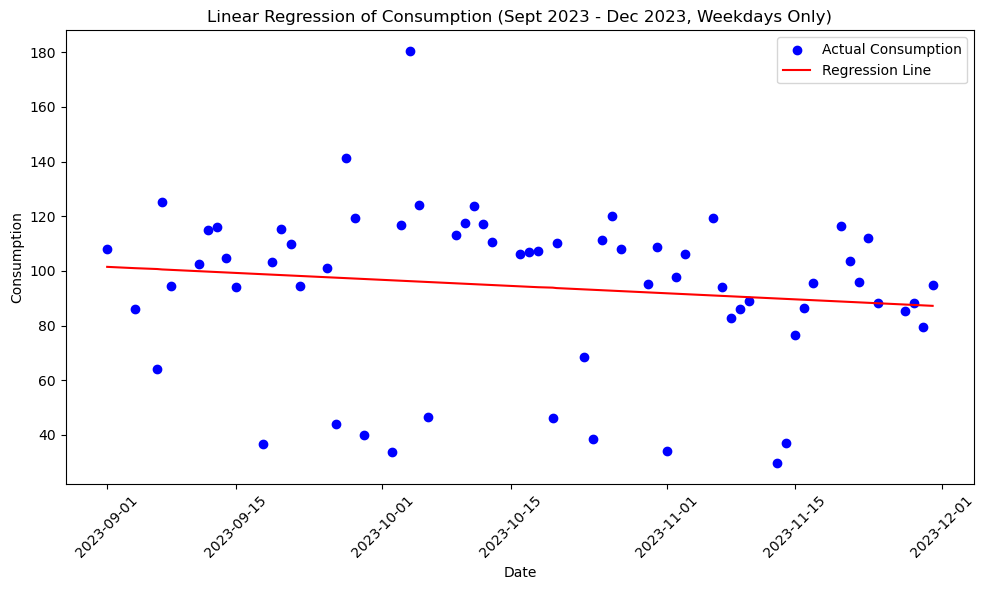

In [25]:
# Define the date range (September 1, 2023 to December 1, 2023)
start_date = '2023-09-01'
end_date = '2023-12-01'

# Filter the weekday_data to only include rows within this date range
filtered_data = weekday_data_2[(weekday_data_2['date'] >= start_date) & (weekday_data_2['date'] <= end_date)]

# Convert 'Date' to ordinal for numerical analysis (on the filtered data)
filtered_data.loc[:, 'Date_ordinal'] = filtered_data['date'].map(pd.Timestamp.toordinal)

# Define the predictor (X) and target (y) variables
X_filtered = filtered_data[['Date_ordinal']]
y_filtered = filtered_data['consumption']

# Create the linear regression model
model = LinearRegression()
model.fit(X_filtered, y_filtered)

# Get the coefficient (slope) and intercept
slope = model.coef_[0]
intercept = model.intercept_

# Print the regression line equation
print(f'Regression line (for 3 months): consumption = {slope} * Date_ordinal + {intercept}')

# Plot the actual data points
plt.figure(figsize=(10, 6))
plt.scatter(filtered_data['date'], y_filtered, color='blue', label='Actual Consumption')

# Create predictions using the regression line
predicted_consumption_filtered = model.predict(X_filtered)

# Plot the regression line
plt.plot(filtered_data['date'], predicted_consumption_filtered, color='red', label='Regression Line')

# Add labels, title, and legend
plt.xlabel('Date')
plt.ylabel('Consumption')
plt.title('Linear Regression of Consumption (Sept 2023 - Dec 2023, Weekdays Only)')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()

# Show the plot
plt.show()


In [29]:
import pandas as pd
# Load the Excel file
df = pd.read_excel(r'C:\Users\siddh\Downloads\energy_updated.xlsx')
# Check the first few rows
df.head()

,floor,date,day,consumption,createdAt,updatedAt
0,First Floor,2023-09-01 00:00:29.233,Friday,161.10,2024-09-25 10:54:02.172,2024-09-25 10:54:02.172
1,Ground Floor,2023-09-01 00:00:29.233,Friday,27.71,2024-09-25 10:54:02.173,2024-09-25 10:54:02.173
2,Second Floor,2023-09-01 00:00:29.233,Friday,108.12,2024-09-25 10:54:02.173,2024-09-25 10:54:02.173
3,First Floor,2023-09-02 00:00:15.160,Saturday,55.44,2024-09-25 10:54:02.173,2024-09-25 10:54:02.173
4,Ground Floor,2023-09-02 00:00:15.160,Saturday,14.34,2024-09-25 10:54:02.173,2024-09-25 10:54:02.173


In [31]:
# Filter for first floor data
first_floor_df = df[df['floor'] == 'First Floor'].copy()
first_floor_df.head()

,floor,date,day,consumption,createdAt,updatedAt
0,First Floor,2023-09-01 00:00:29.233,Friday,161.10,2024-09-25 10:54:02.172,2024-09-25 10:54:02.172
3,First Floor,2023-09-02 00:00:15.160,Saturday,55.44,2024-09-25 10:54:02.173,2024-09-25 10:54:02.173
6,First Floor,2023-09-03 00:00:30.394,Sunday,46.55,2024-09-25 10:54:02.173,2024-09-25 10:54:02.173
9,First Floor,2023-09-04 00:00:33.006,Monday,99.10,2024-09-25 10:54:02.173,2024-09-25 10:54:02.173
14,First Floor,2023-09-06 10:40:18.479,Wednesday,100.11,2024-09-25 10:54:02.173,2024-09-25 10:54:02.173


In [33]:
# Convert the 'Date' column to datetime (assuming it's called 'Date')
first_floor_df['date'] = pd.to_datetime(first_floor_df['date'])
first_floor_df.head()

,floor,date,day,consumption,createdAt,updatedAt
0,First Floor,2023-09-01 00:00:29.233,Friday,161.10,2024-09-25 10:54:02.172,2024-09-25 10:54:02.172
3,First Floor,2023-09-02 00:00:15.160,Saturday,55.44,2024-09-25 10:54:02.173,2024-09-25 10:54:02.173
6,First Floor,2023-09-03 00:00:30.394,Sunday,46.55,2024-09-25 10:54:02.173,2024-09-25 10:54:02.173
9,First Floor,2023-09-04 00:00:33.006,Monday,99.10,2024-09-25 10:54:02.173,2024-09-25 10:54:02.173
14,First Floor,2023-09-06 10:40:18.479,Wednesday,100.11,2024-09-25 10:54:02.173,2024-09-25 10:54:02.173


In [35]:
# Filter out weekends (Monday=0, Sunday=6)
weekend_data = first_floor_df[first_floor_df['date'].dt.weekday >= 5 ]
weekend_data.head()

,floor,date,day,consumption,createdAt,updatedAt
3,First Floor,2023-09-02 00:00:15.160,Saturday,55.44,2024-09-25 10:54:02.173,2024-09-25 10:54:02.173
6,First Floor,2023-09-03 00:00:30.394,Sunday,46.55,2024-09-25 10:54:02.173,2024-09-25 10:54:02.173
21,First Floor,2023-09-09 00:01:07.078,Saturday,49.36,2024-09-25 10:54:02.174,2024-09-25 10:54:02.174
24,First Floor,2023-09-10 00:00:41.460,Sunday,46.00,2024-09-25 10:54:02.174,2024-09-25 10:54:02.174
42,First Floor,2023-09-16 00:00:22.628,Saturday,60.84,2024-09-25 10:54:02.174,2024-09-25 10:54:02.174


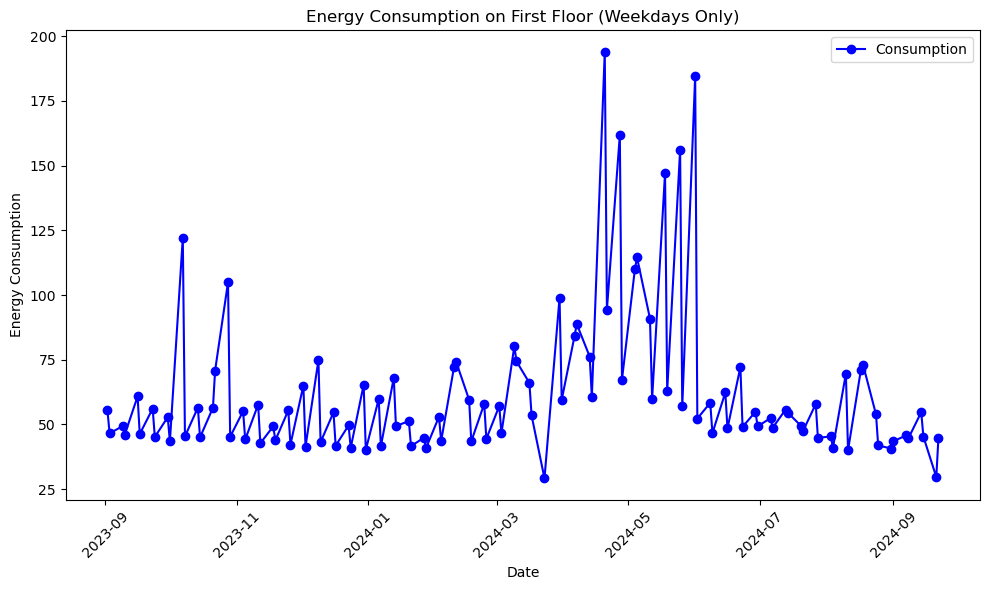

In [37]:
import matplotlib.pyplot as plt

# Plot consumption over time (assuming 'consumption' is the column name)
plt.figure(figsize=(10, 6))
plt.plot(weekend_data['date'], weekend_data['consumption'], color='blue', marker='o', linestyle='-', label='Consumption')

# Add labels, title, and legend
plt.xlabel('Date')
plt.ylabel('Energy Consumption')
plt.title('Energy Consumption on First Floor (Weekdays Only)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.legend()
plt.show()


In [41]:
# Convert 'Date' column to ordinal numbers (or use timestamps if preferred)
weekend_data.loc[:, 'Date_ordinal'] = weekend_data['date'].map(pd.Timestamp.toordinal)

# Calculate the correlation between 'Date_ordinal' and 'consumption'
correlation = weekend_data[['Date_ordinal', 'consumption']].corr()

# Display the correlation matrix
print(correlation)

              Date_ordinal  consumption
Date_ordinal      1.000000     0.082846
consumption       0.082846     1.000000


C:\Users\siddh\AppData\Local\Temp\ipykernel_7948\2092082756.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  weekend_data.loc[:, 'Date_ordinal'] = weekend_data['date'].map(pd.Timestamp.toordinal)


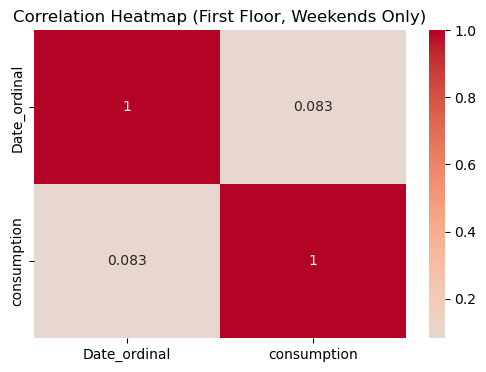

In [43]:
import seaborn as sns

# Plot heatmap of the correlation matrix
plt.figure(figsize=(6, 4))
sns.heatmap(correlation, annot=True, cmap='coolwarm', center=0)

# Add title
plt.title('Correlation Heatmap (First Floor, Weekends Only)')
plt.show()

In [45]:
from sklearn.linear_model import LinearRegression

# Define the predictor and target variables
X = weekend_data[['date']]  # Replace with the relevant predictor(s)
y = weekend_data['consumption']

# Create the linear regression model
model = LinearRegression()
model.fit(X, y)

# Get the coefficient (slope) and intercept
slope = model.coef_[0]
intercept = model.intercept_

# Print the regression line equation
print(f'Regression line: consumption = {slope} * Temperature + {intercept}')

Regression line: consumption = 2.4402213247299924e-16 * Temperature + -355.4609074816364


Regression line: consumption = 0.02108355785591848 * Date_ordinal + -15517.976521597086


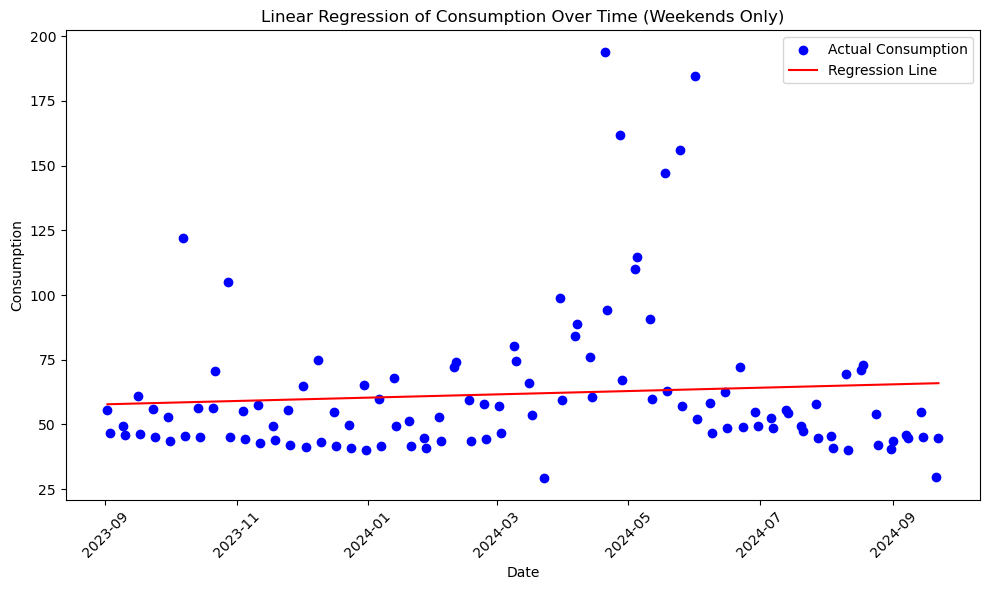

In [47]:
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import numpy as np

# Convert 'Date' to ordinal for numerical analysis
weekend_data.loc[:, 'Date_ordinal'] = weekend_data['date'].map(pd.Timestamp.toordinal)

# Define the predictor (X) and target (y) variables
X = weekend_data[['Date_ordinal']]  # 'Date_ordinal' is the numerical version of 'Date'
y = weekend_data['consumption']

# Create the linear regression model
model = LinearRegression()
model.fit(X, y)

# Get the coefficient (slope) and intercept
slope = model.coef_[0]
intercept = model.intercept_

# Print the regression line equation
print(f'Regression line: consumption = {slope} * Date_ordinal + {intercept}')

# Plot the actual data points
plt.figure(figsize=(10, 6))
plt.scatter(weekend_data['date'], y, color='blue', label='Actual Consumption')

# Create predictions using the regression line
predicted_consumption = model.predict(X)

# Plot the regression line
plt.plot(weekend_data['date'], predicted_consumption, color='red', label='Regression Line')

# Add labels, title, and legend
plt.xlabel('Date')
plt.ylabel('Consumption')
plt.title('Linear Regression of Consumption Over Time (Weekends Only)')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()

# Show the plot
plt.show()

Regression line (for 3 months): consumption = -0.007096819391901342 * Date_ordinal + 5298.540700574458


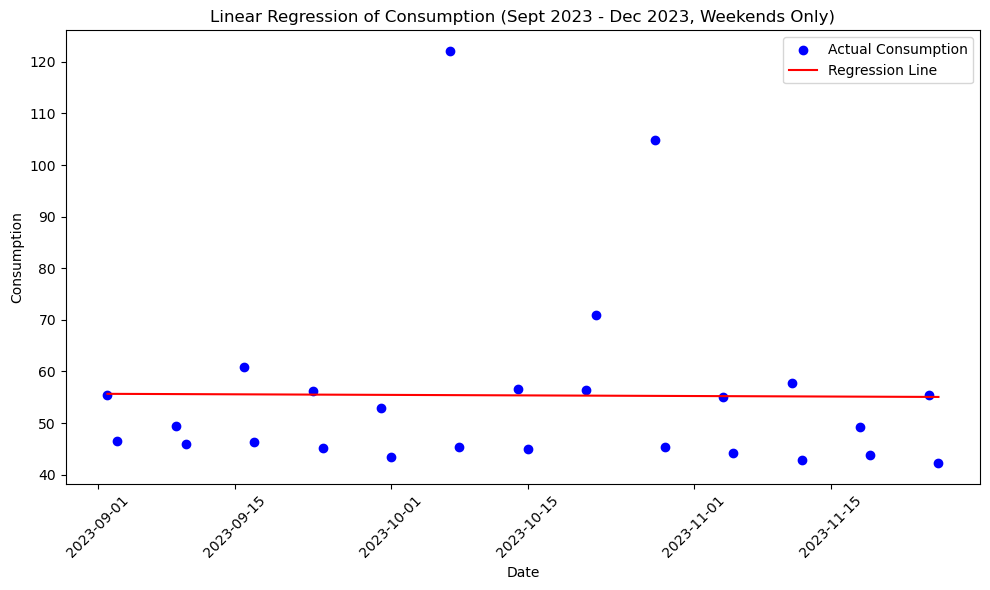

In [49]:
# Define the date range (September 1, 2023 to December 1, 2023)
start_date = '2023-09-01'
end_date = '2023-12-01'

# Filter the weekend_data to only include rows within this date range
filtered_data = weekend_data[(weekend_data['date'] >= start_date) & (weekend_data['date'] <= end_date)]

# Convert 'Date' to ordinal for numerical analysis (on the filtered data)
filtered_data.loc[:, 'Date_ordinal'] = filtered_data['date'].map(pd.Timestamp.toordinal)

# Define the predictor (X) and target (y) variables
X_filtered = filtered_data[['Date_ordinal']]
y_filtered = filtered_data['consumption']

# Create the linear regression model
model = LinearRegression()
model.fit(X_filtered, y_filtered)

# Get the coefficient (slope) and intercept
slope = model.coef_[0]
intercept = model.intercept_

# Print the regression line equation
print(f'Regression line (for 3 months): consumption = {slope} * Date_ordinal + {intercept}')

# Plot the actual data points
plt.figure(figsize=(10, 6))
plt.scatter(filtered_data['date'], y_filtered, color='blue', label='Actual Consumption')

# Create predictions using the regression line
predicted_consumption_filtered = model.predict(X_filtered)

# Plot the regression line
plt.plot(filtered_data['date'], predicted_consumption_filtered, color='red', label='Regression Line')

# Add labels, title, and legend
plt.xlabel('Date')
plt.ylabel('Consumption')
plt.title('Linear Regression of Consumption (Sept 2023 - Dec 2023, Weekends Only)')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()

# Show the plot
plt.show()


In [51]:
import pandas as pd
# Load the Excel file
df = pd.read_excel(r'C:\Users\siddh\Downloads\energy_updated.xlsx')
# Check the first few rows
df.head()

,floor,date,day,consumption,createdAt,updatedAt
0,First Floor,2023-09-01 00:00:29.233,Friday,161.10,2024-09-25 10:54:02.172,2024-09-25 10:54:02.172
1,Ground Floor,2023-09-01 00:00:29.233,Friday,27.71,2024-09-25 10:54:02.173,2024-09-25 10:54:02.173
2,Second Floor,2023-09-01 00:00:29.233,Friday,108.12,2024-09-25 10:54:02.173,2024-09-25 10:54:02.173
3,First Floor,2023-09-02 00:00:15.160,Saturday,55.44,2024-09-25 10:54:02.173,2024-09-25 10:54:02.173
4,Ground Floor,2023-09-02 00:00:15.160,Saturday,14.34,2024-09-25 10:54:02.173,2024-09-25 10:54:02.173


In [53]:
# Filter for first floor data
second_floor_df = df[df['floor'] == 'Second Floor'].copy()
second_floor_df.head()

,floor,date,day,consumption,createdAt,updatedAt
2,Second Floor,2023-09-01 00:00:29.233,Friday,108.12,2024-09-25 10:54:02.173,2024-09-25 10:54:02.173
5,Second Floor,2023-09-02 00:00:15.160,Saturday,44.47,2024-09-25 10:54:02.173,2024-09-25 10:54:02.173
8,Second Floor,2023-09-03 00:00:30.394,Sunday,33.66,2024-09-25 10:54:02.173,2024-09-25 10:54:02.173
11,Second Floor,2023-09-04 00:00:33.006,Monday,86.00,2024-09-25 10:54:02.173,2024-09-25 10:54:02.173
13,Second Floor,2023-09-06 10:40:18.478,Wednesday,64.16,2024-09-25 10:54:02.173,2024-09-25 10:54:02.173


In [55]:
second_floor_df['date'] = pd.to_datetime(second_floor_df['date'])
second_floor_df.head()

,floor,date,day,consumption,createdAt,updatedAt
2,Second Floor,2023-09-01 00:00:29.233,Friday,108.12,2024-09-25 10:54:02.173,2024-09-25 10:54:02.173
5,Second Floor,2023-09-02 00:00:15.160,Saturday,44.47,2024-09-25 10:54:02.173,2024-09-25 10:54:02.173
8,Second Floor,2023-09-03 00:00:30.394,Sunday,33.66,2024-09-25 10:54:02.173,2024-09-25 10:54:02.173
11,Second Floor,2023-09-04 00:00:33.006,Monday,86.00,2024-09-25 10:54:02.173,2024-09-25 10:54:02.173
13,Second Floor,2023-09-06 10:40:18.478,Wednesday,64.16,2024-09-25 10:54:02.173,2024-09-25 10:54:02.173


In [57]:
weekday_data_2 = second_floor_df[second_floor_df['date'].dt.weekday >= 5]
weekday_data_2.head()

,floor,date,day,consumption,createdAt,updatedAt
5,Second Floor,2023-09-02 00:00:15.160,Saturday,44.47,2024-09-25 10:54:02.173,2024-09-25 10:54:02.173
8,Second Floor,2023-09-03 00:00:30.394,Sunday,33.66,2024-09-25 10:54:02.173,2024-09-25 10:54:02.173
23,Second Floor,2023-09-09 00:01:07.078,Saturday,33.09,2024-09-25 10:54:02.174,2024-09-25 10:54:02.174
26,Second Floor,2023-09-10 00:00:41.460,Sunday,25.25,2024-09-25 10:54:02.174,2024-09-25 10:54:02.174
44,Second Floor,2023-09-16 00:00:22.628,Saturday,36.47,2024-09-25 10:54:02.174,2024-09-25 10:54:02.174


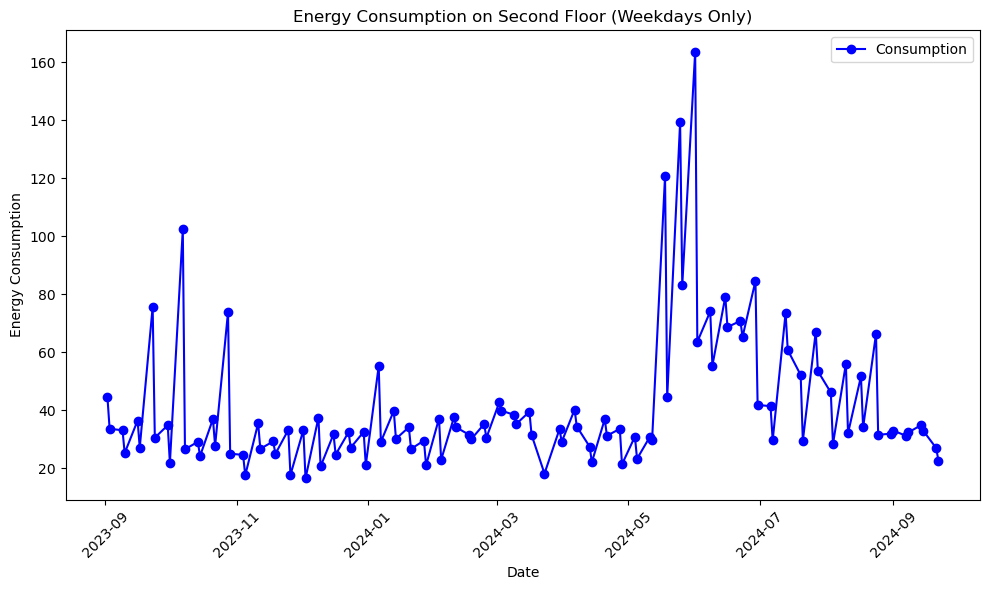

In [59]:
import matplotlib.pyplot as plt

# Plot consumption over time (assuming 'consumption' is the column name)
plt.figure(figsize=(10, 6))
plt.plot(weekday_data_2['date'], weekday_data_2['consumption'], color='blue', marker='o', linestyle='-', label='Consumption')

# Add labels, title, and legend
plt.xlabel('Date')
plt.ylabel('Energy Consumption')
plt.title('Energy Consumption on Second Floor (Weekneds Only)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.legend()
plt.show()

In [61]:
# Convert 'Date' column to ordinal numbers (or use timestamps if preferred)
weekday_data_2.loc[:, 'Date_ordinal'] = weekday_data_2['date'].map(pd.Timestamp.toordinal)

# Calculate the correlation between 'Date_ordinal' and 'consumption'
correlation = weekday_data_2[['Date_ordinal', 'consumption']].corr()

# Display the correlation matrix
print(correlation)

              Date_ordinal  consumption
Date_ordinal       1.00000      0.25475
consumption        0.25475      1.00000


C:\Users\siddh\AppData\Local\Temp\ipykernel_7948\531852503.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  weekday_data_2.loc[:, 'Date_ordinal'] = weekday_data_2['date'].map(pd.Timestamp.toordinal)


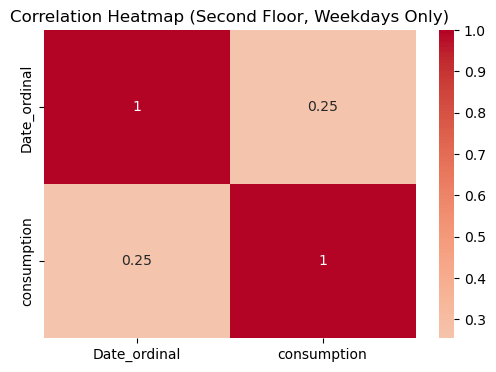

In [63]:
import seaborn as sns

# Plot heatmap of the correlation matrix
plt.figure(figsize=(6, 4))
sns.heatmap(correlation, annot=True, cmap='coolwarm', center=0)

# Add title
plt.title('Correlation Heatmap (Second Floor, Weekdays Only)')
plt.show()

In [65]:
from sklearn.linear_model import LinearRegression

# Define the predictor and target variables
X = weekday_data_2[['date']]  # Replace with the relevant predictor(s)
y = weekday_data_2['consumption']

# Create the linear regression model
model = LinearRegression()
model.fit(X, y)

# Get the coefficient (slope) and intercept
slope = model.coef_[0]
intercept = model.intercept_

# Print the regression line equation
print(f'Regression line: consumption = {slope} * Temperature + {intercept}')

Regression line: consumption = 6.151291484974064e-16 * Temperature + -1011.0842843499254


Regression line: consumption = 0.05314714925524475 * Date_ordinal + -39232.54738405407


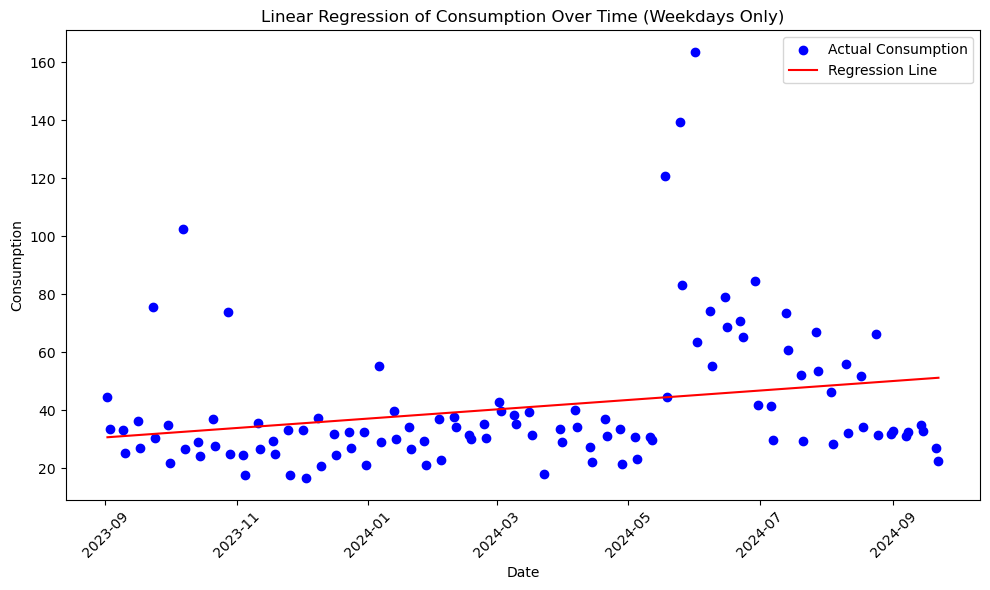

In [67]:
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import numpy as np

# Convert 'Date' to ordinal for numerical analysis
weekday_data_2.loc[:, 'Date_ordinal'] = weekday_data_2['date'].map(pd.Timestamp.toordinal)

# Define the predictor (X) and target (y) variables
X = weekday_data_2[['Date_ordinal']]  # 'Date_ordinal' is the numerical version of 'Date'
y = weekday_data_2['consumption']

# Create the linear regression model
model = LinearRegression()
model.fit(X, y)

# Get the coefficient (slope) and intercept
slope = model.coef_[0]
intercept = model.intercept_

# Print the regression line equation
print(f'Regression line: consumption = {slope} * Date_ordinal + {intercept}')

# Plot the actual data points
plt.figure(figsize=(10, 6))
plt.scatter(weekday_data_2['date'], y, color='blue', label='Actual Consumption')

# Create predictions using the regression line
predicted_consumption = model.predict(X)

# Plot the regression line
plt.plot(weekday_data_2['date'], predicted_consumption, color='red', label='Regression Line')

# Add labels, title, and legend
plt.xlabel('Date')
plt.ylabel('Consumption')
plt.title('Linear Regression of Consumption Over Time (Weekdays Only)')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()

# Show the plot
plt.show()

Regression line (for 3 months): consumption = -0.14886338797814208 * Date_ordinal + 110016.71405212274


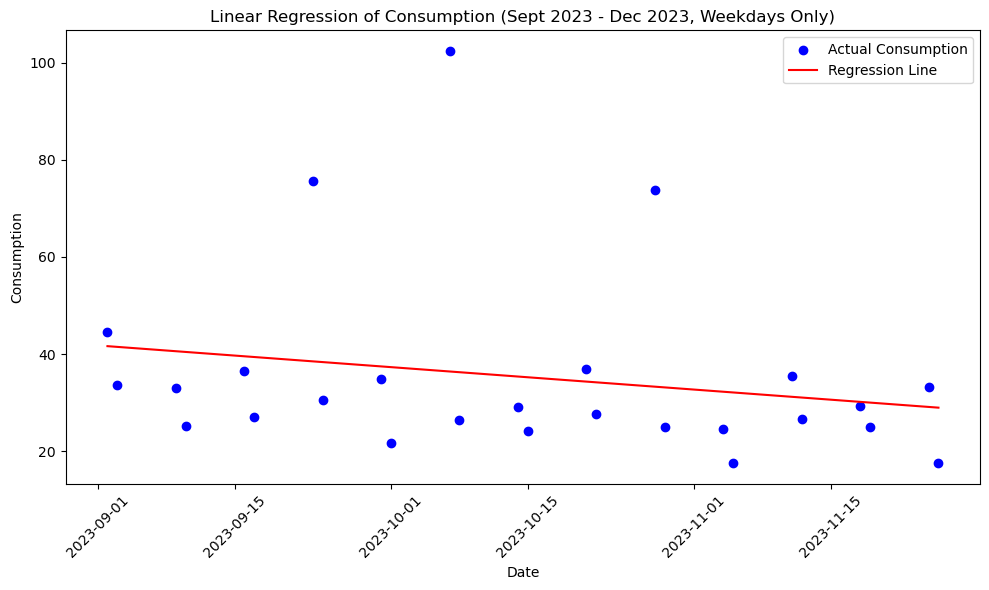

In [69]:
# Define the date range (September 1, 2023 to December 1, 2023)
start_date = '2023-09-01'
end_date = '2023-12-01'

# Filter the weekday_data to only include rows within this date range
filtered_data = weekday_data_2[(weekday_data_2['date'] >= start_date) & (weekday_data_2['date'] <= end_date)]

# Convert 'Date' to ordinal for numerical analysis (on the filtered data)
filtered_data.loc[:, 'Date_ordinal'] = filtered_data['date'].map(pd.Timestamp.toordinal)

# Define the predictor (X) and target (y) variables
X_filtered = filtered_data[['Date_ordinal']]
y_filtered = filtered_data['consumption']

# Create the linear regression model
model = LinearRegression()
model.fit(X_filtered, y_filtered)

# Get the coefficient (slope) and intercept
slope = model.coef_[0]
intercept = model.intercept_

# Print the regression line equation
print(f'Regression line (for 3 months): consumption = {slope} * Date_ordinal + {intercept}')

# Plot the actual data points
plt.figure(figsize=(10, 6))
plt.scatter(filtered_data['date'], y_filtered, color='blue', label='Actual Consumption')

# Create predictions using the regression line
predicted_consumption_filtered = model.predict(X_filtered)

# Plot the regression line
plt.plot(filtered_data['date'], predicted_consumption_filtered, color='red', label='Regression Line')

# Add labels, title, and legend
plt.xlabel('Date')
plt.ylabel('Consumption')
plt.title('Linear Regression of Consumption (Sept 2023 - Dec 2023, Weekdays Only)')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()

# Show the plot
plt.show()
